In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.rcParams.update({"font.size": 16, "figure.figsize": (16, 9)})
import pandas as pd
plt.style.use(["science"])
from scipy.optimize import curve_fit

In [2]:
data = pd.read_excel("data.xlsx", sheet_name="lol")

In [3]:
# intercept

In [4]:
magfield = np.array(data["Mag Field"])
lo = np.array(data["loop outer"])
li = np.array(data["loop inner"])
intercept = np.array(data["intercept"])
tiptip = np.array(data["tiptip"])
lm = 0.5*(lo+li)

In [5]:
def linfit(x,a,b):
    return a*x + b

def invfit(x, a, b):
    return a + b/x

In [6]:
t = 5
params, cov = curve_fit(linfit, magfield[t:], lm[t:])
par1, cov1 = curve_fit(invfit, magfield, tiptip)

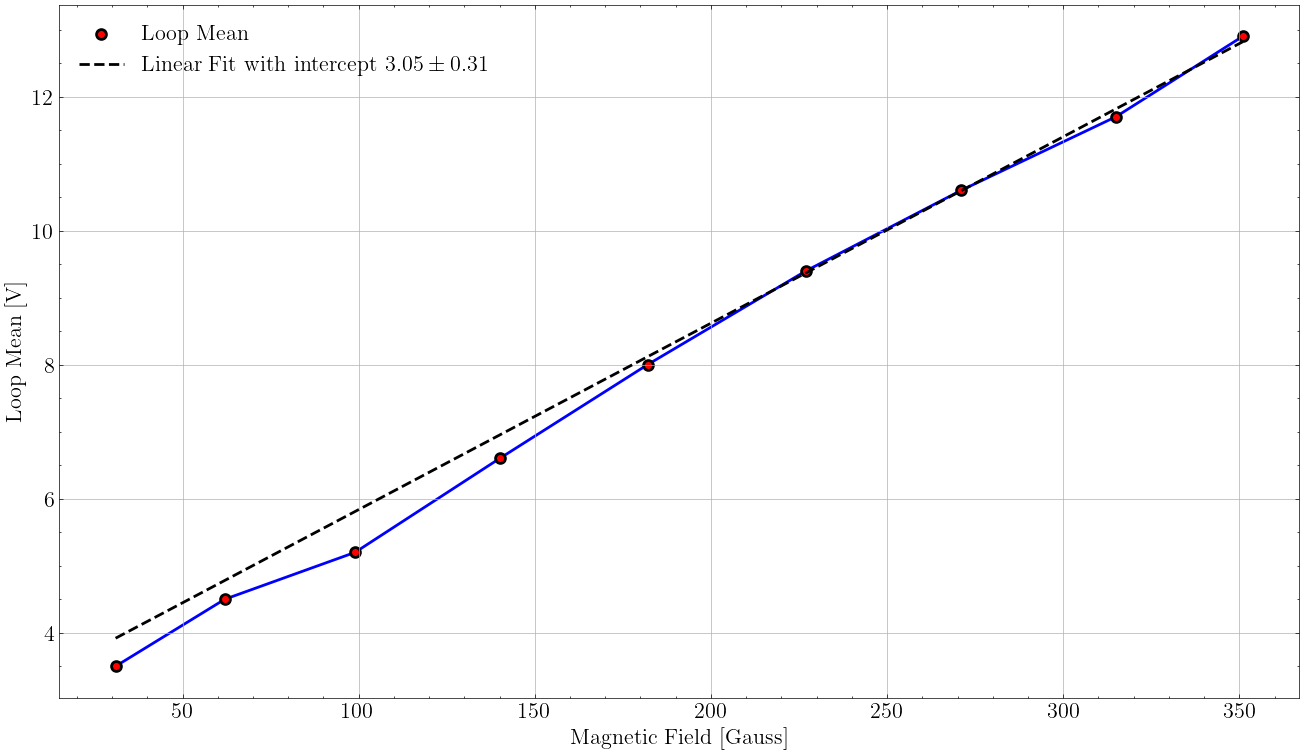

In [7]:

plt.figure(figsize=(16, 9))
plt.scatter(magfield, lm, label="Loop Mean", color="r", edgecolors="k", lw=2, s=50)
plt.plot(magfield, lm, color="blue", lw=2, zorder =0)
plt.plot(magfield, linfit(magfield, *params), color="black", lw=2, label=r"Linear Fit with intercept $3.05 \pm 0.31$", ls = "--")
# plt.scatter(magfield, lo, label="Loop Inner")
# plt.scatter(magfield, li, label="Loop Outer")
plt.xlabel("Magnetic Field [Gauss]")
plt.ylabel("Loop Mean [V]")
plt.legend()
plt.grid()
plt.savefig("loop_mean.png", dpi=300, bbox_inches="tight")


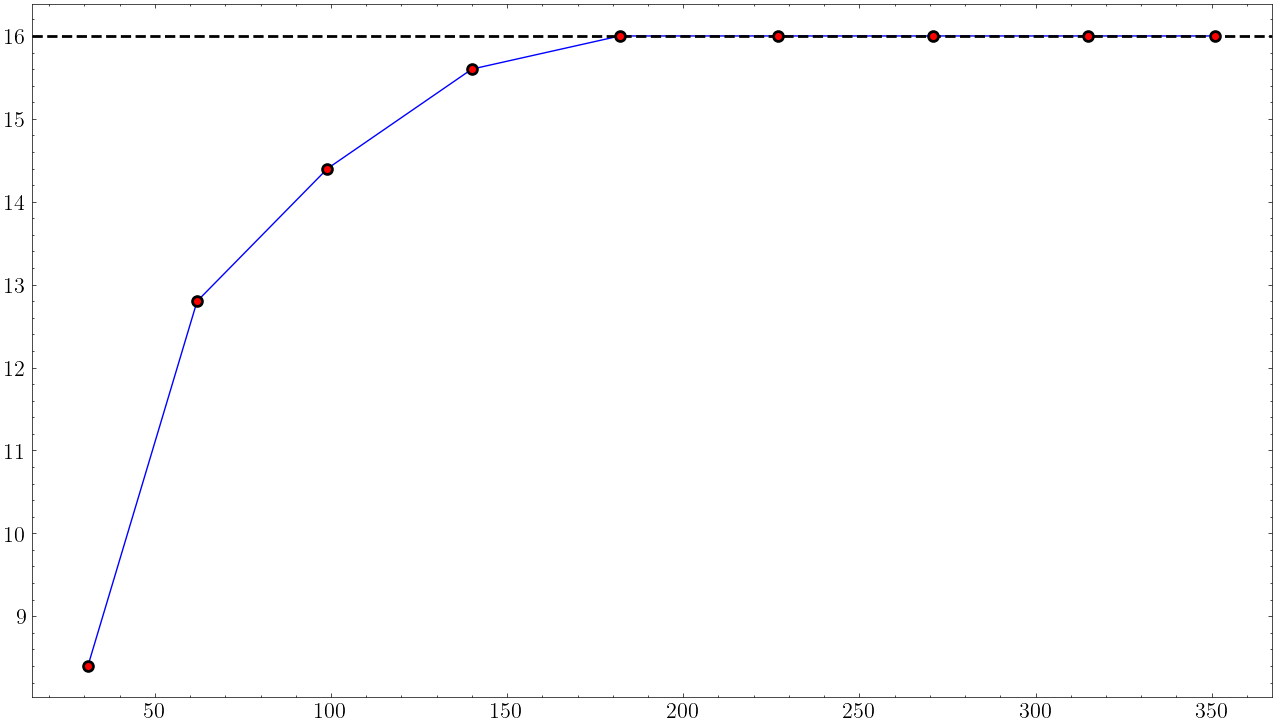

In [8]:
plt.figure(figsize=(16, 9))
plt.scatter(magfield, tiptip, label="Tip to Tip", color="red", edgecolors="k", lw=2, s=50, zorder = 3)
plt.plot(magfield, tiptip, label="Tip to Tip", color="blue")
plt.axhline(16, color="black", lw=2, ls="--", label="Saturation Line")

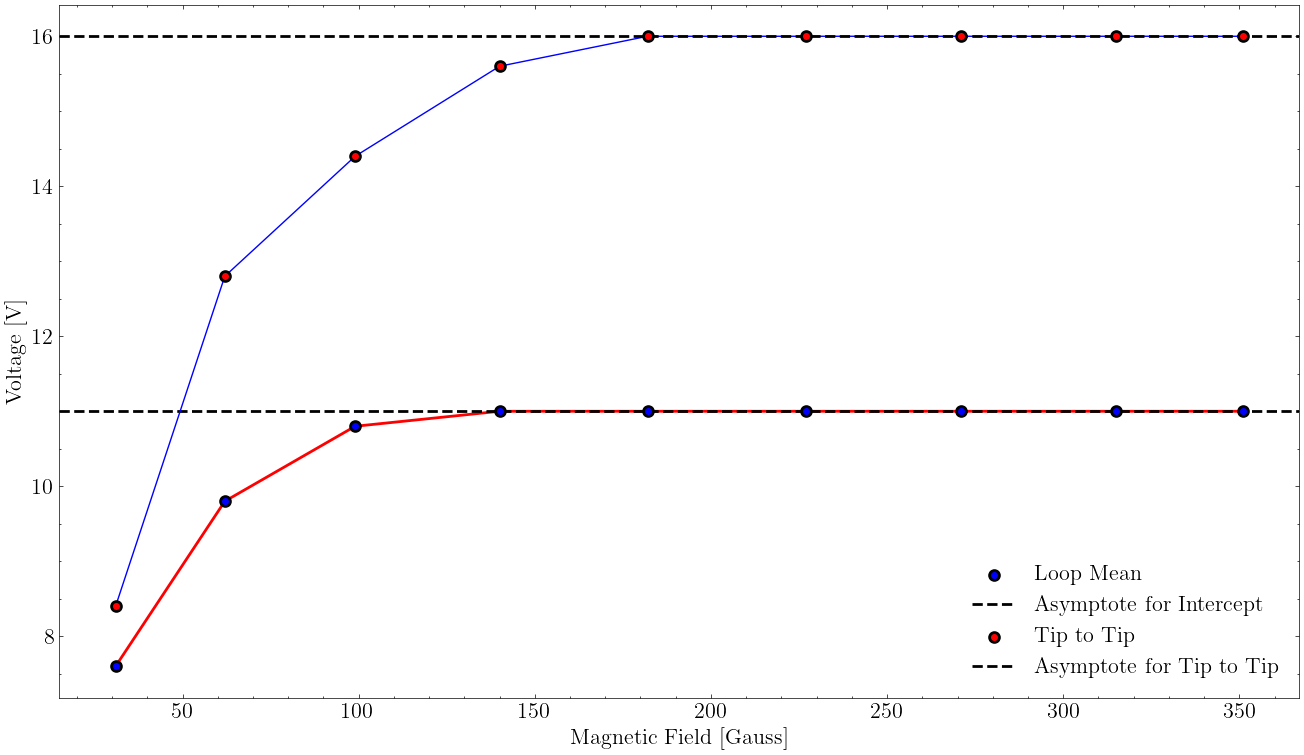

In [10]:
plt.figure(figsize=(16, 9))
plt.scatter(magfield, intercept, label="Loop Mean", color="blue", edgecolors="k", lw=2, s=50, zorder = 3)
plt.plot(magfield, intercept, color="r", lw=2)
plt.axhline(11, color="black", lw=2, ls="--", label="Asymptote for Intercept")
plt.scatter(magfield, tiptip, label="Tip to Tip", color="red", edgecolors="k", lw=2, s=50, zorder = 3)
plt.plot(magfield, tiptip, color="blue")
plt.axhline(16, color="black", lw=2, ls="--", label="Asymptote for Tip to Tip")
plt.xlabel("Magnetic Field [Gauss]")
plt.ylabel("Voltage [V]")
plt.legend()
plt.savefig("intercept1.png", dpi=300, bbox_inches="tight")


In [13]:
par1

array([  17.10978792, -267.32655321])

In [14]:
params

array([0.02781365, 3.05622694])

In [18]:
np.sqrt(np.diag(cov))

array([0.00110941, 0.32694512])